In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer             # timer library is used to for calculation of execution time

In [2]:
train = pd.read_csv("input/train.csv")
test  = pd.read_csv("input/test.csv")

print("Shape of train: ", train.shape, "Shape of test: ", test.shape)

Shape of train:  (7352, 563) Shape of test:  (2947, 563)


In [3]:
# To check if there are any null values
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [4]:
# Data set analysis
# Number of samples of 6 activities in train set 
# Number of features = 561
print(train.Activity.value_counts())

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


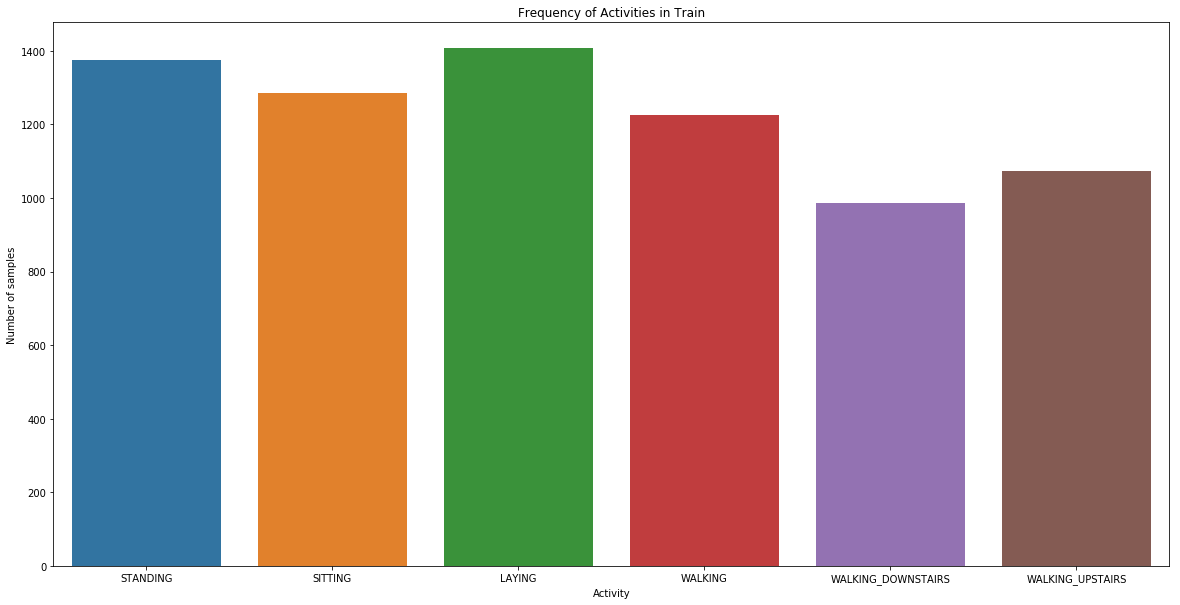

In [5]:
# Bar Plot to find count of train samples

plt.figure(figsize = (20,10))
sns.countplot(train.Activity)
plt.xlabel('Activity')
plt.ylabel('Number of samples')
plt.title('Frequency of Activities in Train')
plt.show()

In [6]:
# To find the number of activities in test
print(test.Activity.value_counts())

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


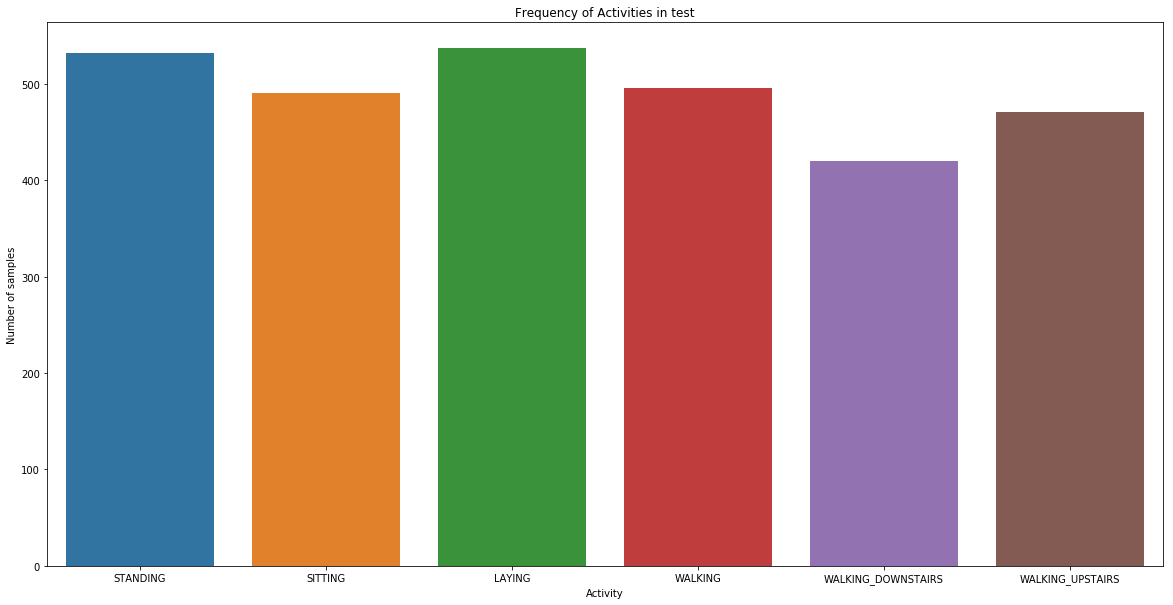

In [7]:
plt.figure(figsize = (20,10))
sns.countplot(test.Activity)
plt.xlabel('Activity')
plt.ylabel('Number of samples')
plt.title('Frequency of Activities in test')
plt.show()

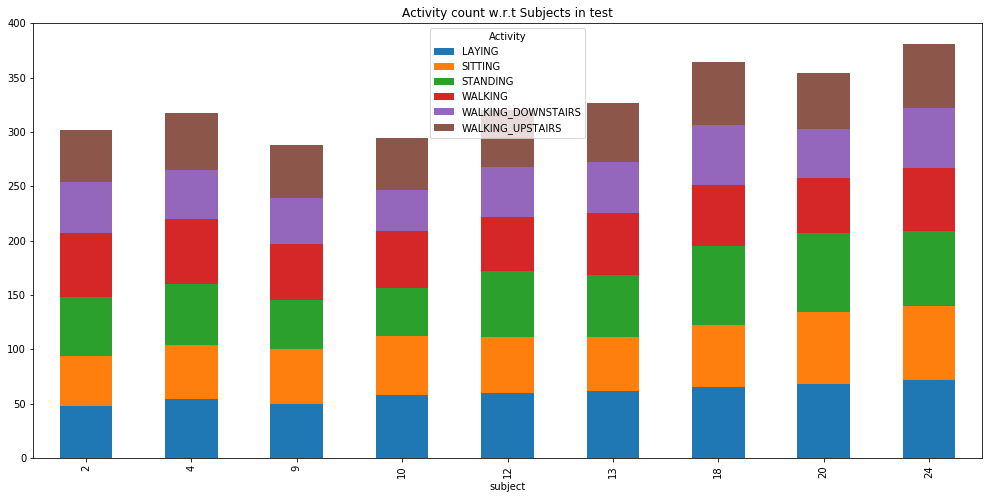

In [8]:
# Stacked Bar Chart for different activities w.r.t subjects in test DataFrame

stack_group = test.groupby(['subject','Activity']).size().unstack()
stack_group.plot(kind='bar',stacked=True, figsize=(17, 8), title = 'Activity count w.r.t Subjects in test')
plt.show()

In [9]:
# Features and labels of train
train_features_train = train.iloc[:,0:562]
train_label_train = train['Activity']

# Features and labels of test
features_val = test.iloc[:,0:562]
label_val = test['Activity']

In [10]:
# Use numpy to convert "Activity" to array
labels_train = np.array(train_label_train) # Array with actual value to train and predict

# Convert to numpy array
features_train = np.array(train_features_train) #Convert for analyzing the data
features_val = np.array(features_val)

label_val = np.array(label_val)

In [11]:
# Split data into test and train in 75:25 and with random_state = 1300

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_train, labels_train, test_size = 0.25, random_state = 1300)

print( "train_features:", train_features.shape, "train_labels: ", train_labels.shape , "test_features: ", test_features.shape, "test_labels:" , test_labels.shape)

train_features: (5514, 562) train_labels:  (5514,) test_features:  (1838, 562) test_labels: (1838,)


In [12]:
# Dimentionality Reduction, Principal Component Analysis, with n_components = 120

from sklearn.decomposition import PCA

pca = PCA(n_components=120, random_state = 1300)  
X_train = pca.fit_transform(train_features)  
X_test = pca.transform(test_features)  

Val_fea_PCA = pca.transform(features_val)

In [13]:
# New DataSets with reduced dimensions

print(X_train.shape)
print(train_labels.shape)
print(X_test.shape)
print(test_labels.shape)
print(Val_fea_PCA.shape)
print(label_val.shape)

(5514, 120)
(5514,)
(1838, 120)
(1838,)
(2947, 120)
(2947,)


In [14]:
#(1)
# Import Random Forest Classifier from sklearn
# 
from sklearn.ensemble import RandomForestClassifier
clf_RF_n = [RandomForestClassifier(n_estimators = 50, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, random_state  = 1300),
            RandomForestClassifier(n_estimators = 200, random_state  = 1300),
            RandomForestClassifier(n_estimators = 400, random_state  = 1300),
            RandomForestClassifier(n_estimators = 500, random_state  = 1300)]

In [15]:
# Model Evaluation with accuracy score

from sklearn.metrics import accuracy_score

# Create a list to save execution time and accuracy
ex_time_RF_n = []
acc_RF_n = []

for clf in clf_RF_n :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_n.append(elapsed)
    acc_RF_n.append(accuracy)

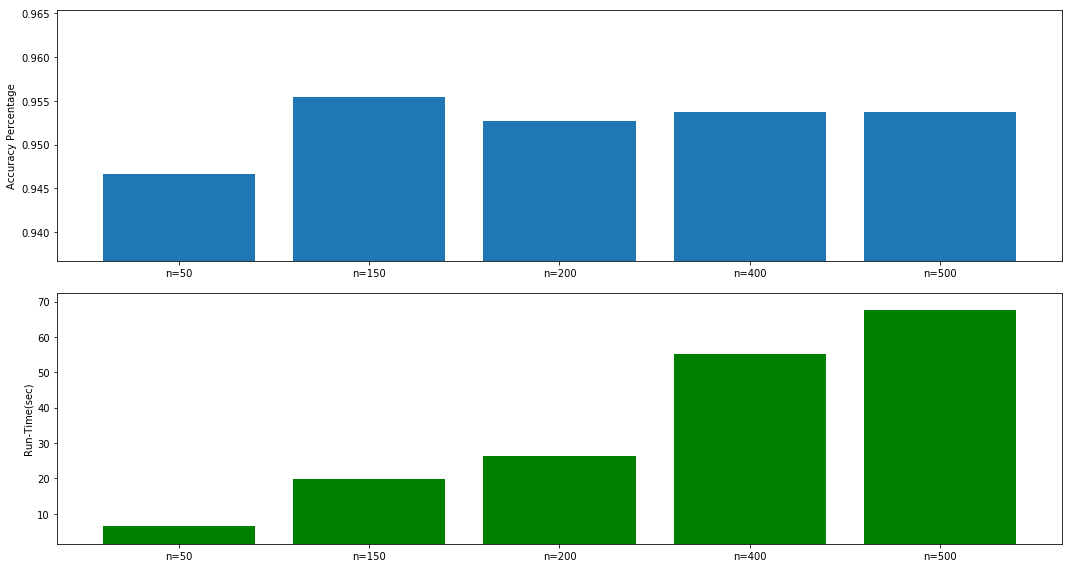

In [16]:
# Graphical Representation of ACCURACY and EXECUTION Time for RANDOM FOREST CLASSIFIER w.r.t number of estimators

label = ('n=50','n=150','n=200','n=400','n=500')
Accu = acc_RF_n
ExTime = ex_time_RF_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [17]:
# Keeping number of estimators constant
clf_RF_d = [RandomForestClassifier(n_estimators = 150, max_depth = 10, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, max_depth = 50, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, max_depth = 100, random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, max_depth = 500,random_state  = 1300),
            RandomForestClassifier(n_estimators = 150, max_depth = 800, random_state  = 1300)]

In [18]:
ex_time_RF_d = []
acc_RF_d = []

for clf in clf_RF_d :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_d.append(elapsed)
    acc_RF_d.append(accuracy)

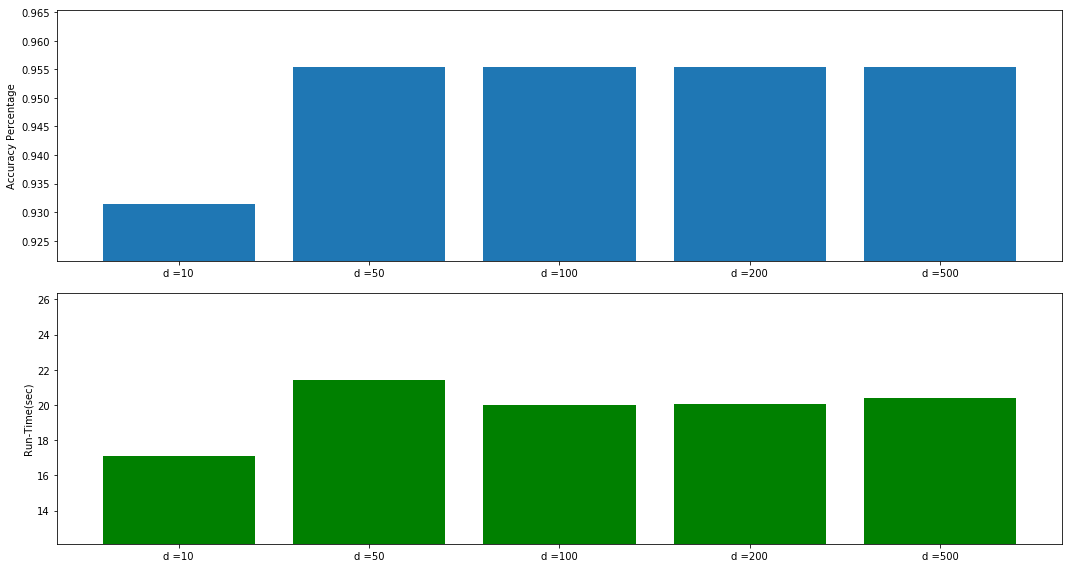

In [19]:
# Graphical Representation of ACCURACY and Execution Time for Random Forest with different max depths of a tree.

label = ('d =10','d =50','d =100','d =200','d =500')
Accu = acc_RF_d
ExTime = ex_time_RF_d


plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')


#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [20]:
# Keeping number of estimators and max_depth constant, with variable max_features
RF_f_n = 150
RF_f_d = 50

clf_RF_f = [RandomForestClassifier(n_estimators = RF_f_n, max_depth = RF_f_d, max_features= 'log2', random_state  = 1300),
            RandomForestClassifier(n_estimators = RF_f_n, max_depth = RF_f_d, max_features= 'sqrt',random_state  = 1300),
            RandomForestClassifier(n_estimators = RF_f_n, max_depth = RF_f_d, max_features= None,random_state  = 1300)]

In [21]:
ex_time_RF_f = []
acc_RF_f = []

for clf in clf_RF_f :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_RF_f.append(elapsed)
    acc_RF_f.append(accuracy)

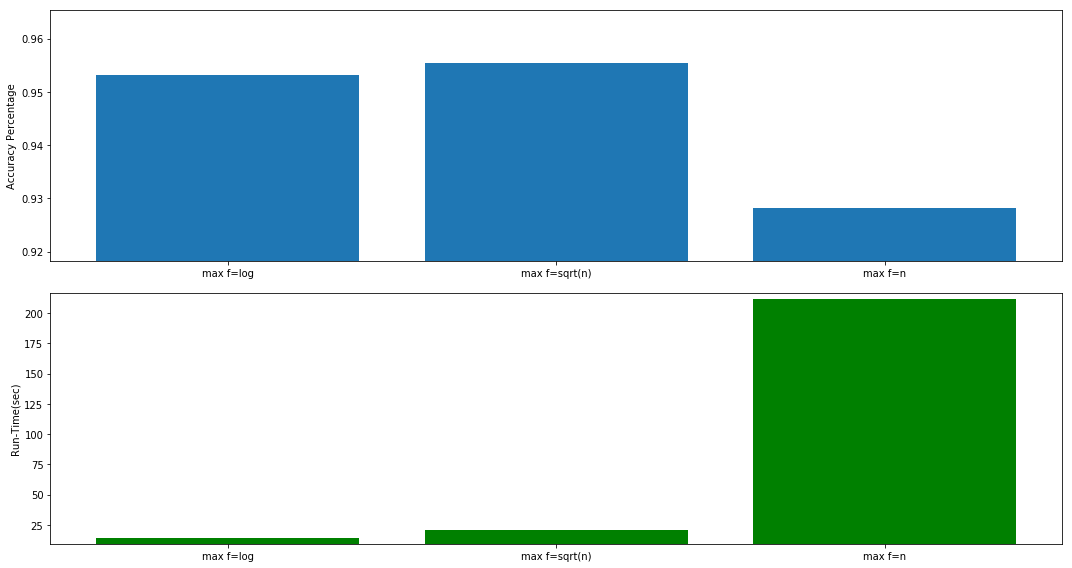

In [22]:
# Graphical Representation of ACCURACY and Execution Time for Random Forest with different max features.

label = ('max f=log','max f=sqrt(n)','max f=n')
Accu = acc_RF_f
ExTime = ex_time_RF_f

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [23]:
# Apply Gradient Boosting for different learning Rates with number of estimators and depth constant

from sklearn.ensemble import GradientBoostingClassifier as GBC

clf_GBC_lr = [GBC(learning_rate=0.05, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
           GBC(learning_rate=0.1, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
           GBC(learning_rate=0.4, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
           GBC(learning_rate=0.8, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300)]

In [24]:
ex_time_GBC_lr = []
acc_GBC_lr = []

for clf in clf_GBC_lr :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_lr.append(elapsed)
    acc_GBC_lr.append(accuracy)

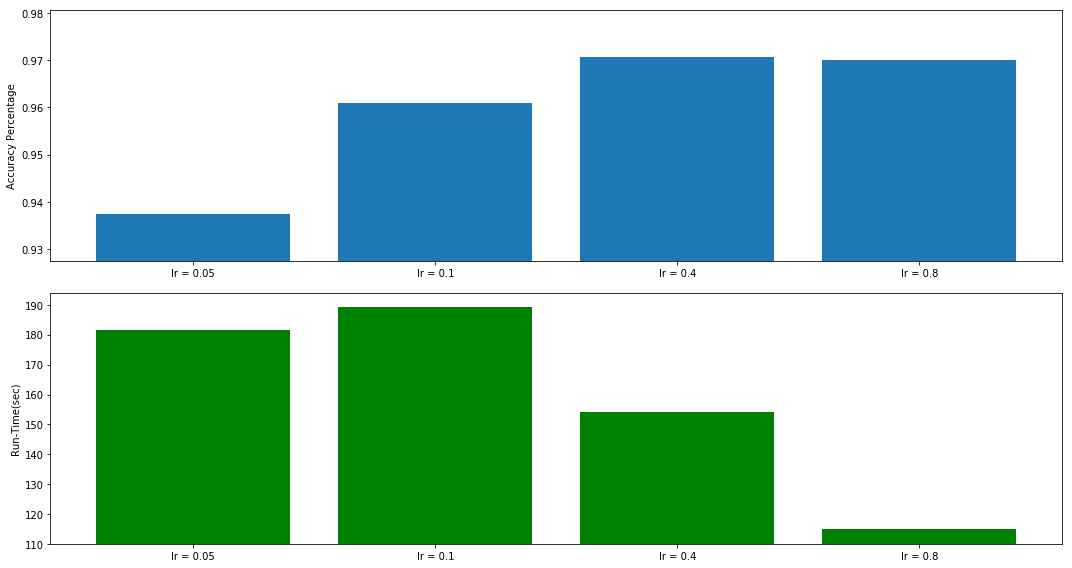

In [25]:
# Graphical Representation of ACCURACY and Execution Time for GBC for different learning rates

label = ('lr = 0.05','lr = 0.1','lr = 0.4','lr = 0.8')
Accu = acc_GBC_lr
ExTime = ex_time_GBC_lr

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [26]:
# Apply gradient boosting with constant learning rate and max_depth, variable = number of estimators
clf_GBC_n = [GBC(learning_rate=0.8, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=200, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=500, max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state = 1300)]

In [28]:
ex_time_GBC_n = []
acc_GBC_n = []

for clf in clf_GBC_n :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_n.append(elapsed)
    acc_GBC_n.append(accuracy)

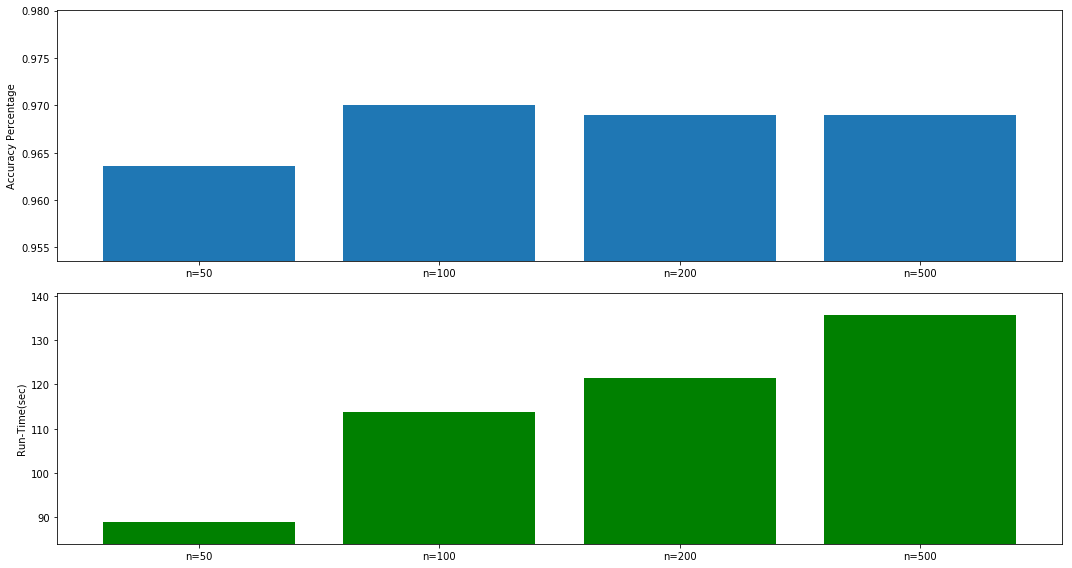

In [29]:
# Graphical Representation of ACCURACY and EXECUTION Time for GBC with different n_estimators.

label = ('n=50','n=100','n=200','n=500')
Accu = acc_GBC_n
ExTime = ex_time_GBC_n

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [30]:
# Apply gradient boosting with constant learning rate and number of estimators, variable = max_depth
clf_GBC_d = [GBC(learning_rate=0.8, n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=7, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=15, min_samples_split=2, min_samples_leaf=1, random_state = 1300),
             GBC(learning_rate=0.8, n_estimators=100, max_depth=25, min_samples_split=2, min_samples_leaf=1, random_state = 1300)]

In [31]:
ex_time_GBC_d = []
acc_GBC_d = []

for clf in clf_GBC_d :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_d.append(elapsed)
    acc_GBC_d.append(accuracy)

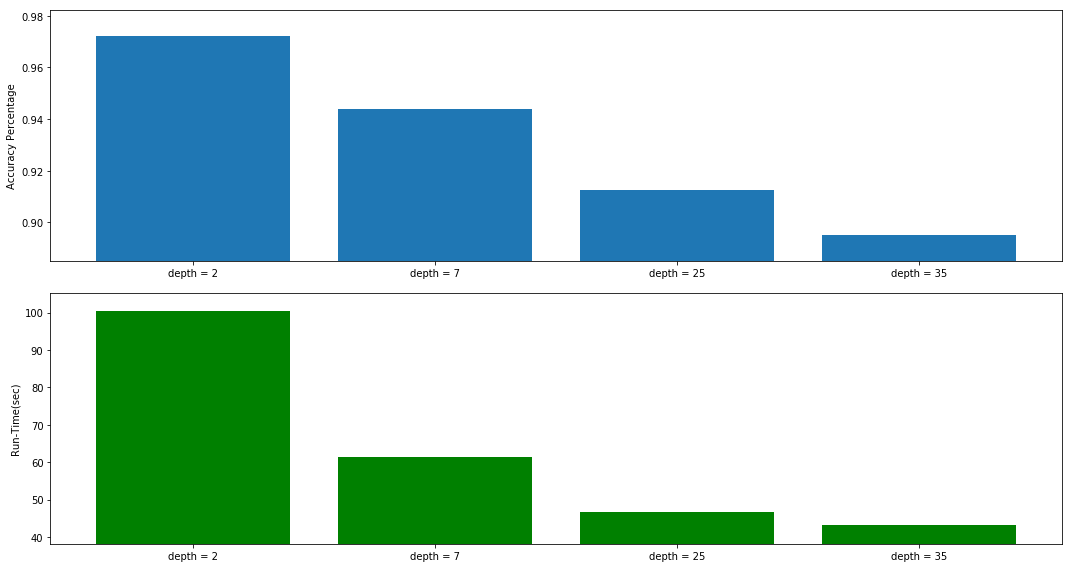

In [32]:
# Graphical Representation of ACCURACY and EXECUTION Time for GBC with different maximum depths.
label = ('depth = 2','depth = 7', 'depth = 25', 'depth = 35')
Accu = acc_GBC_d
ExTime = ex_time_GBC_d

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [33]:
# Applying gradient boosting classifier with max_features 
clf_GBC_f = [GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, max_features ='log2', random_state=1300),
             GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, max_features ='sqrt', random_state=1300),
             GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, random_state=1300)]

In [34]:
ex_time_GBC_f = []
acc_GBC_f = []

for clf in clf_GBC_f :
    start_time = timer()
    fit = clf.fit(X_train, train_labels)
    pred = fit.predict(X_test)
    accuracy = accuracy_score(test_labels, pred)
    elapsed = timer() - start_time
    
    ex_time_GBC_f.append(elapsed)
    acc_GBC_f.append(accuracy)

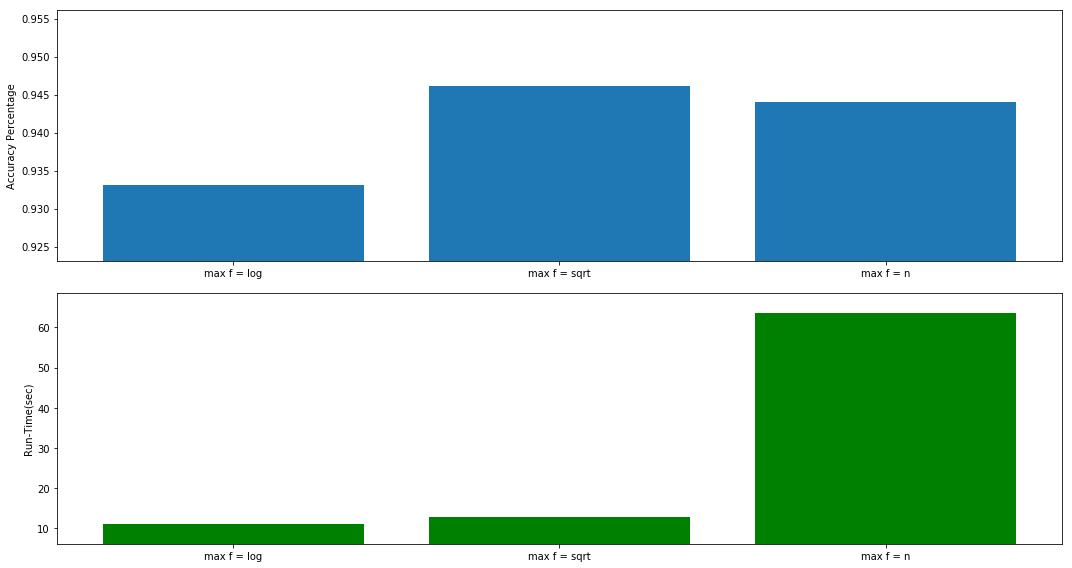

In [35]:
# Graphical Representation of ACCURACY and EXECUTION Time for GBC with different maximum feature functions
label = ('max f = log','max f = sqrt','max f = n')
Accu = acc_GBC_f
ExTime = ex_time_GBC_f

plt.figure(figsize = (15,8))
y_pos = np.arange(len(label))

#Accuracy
plt.subplot(2,1,1)
plt.bar(y_pos, Accu, align='center')
plt.xticks(y_pos, label)
plt.ylim(min(Accu)- 0.01 , max(Accu) +0.01)
plt.ylabel('Accuracy Percentage')

#Execution Time
plt.subplot(2,1,2)
plt.bar(y_pos, ExTime, align='center', color = 'g')
plt.xticks(y_pos, label)
plt.ylim(min(ExTime)- 5 , max(ExTime) +5)
plt.ylabel('Run-Time(sec)')

plt.tight_layout()
plt.show()

In [36]:
# Import cross validation score
from sklearn.model_selection import cross_val_score

In [37]:
# Best four ensemble models
model_com = [RandomForestClassifier(n_estimators = 150, max_depth = 50, max_features= 'log2', random_state = 1300),
             RandomForestClassifier(n_estimators = 150, max_depth = 50, max_features= 'sqrt',random_state = 1300),
             GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, max_features ='log2',random_state = 1300 ),
             GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, max_features ='sqrt',random_state = 1300)]

In [38]:
# Applying different cross validation folds for log max_feature for random forest
values = [3,5,7,10]
RF_log = model_com[0]

scores_RF_log = []
time_RF_log = []
for s in values :
    start = timer()
    score = cross_val_score(RF_log, features_train, train_label_train, cv= s)
    end = timer() - start
    scores_RF_log.append(score)
    time_RF_log.append(end)

In [39]:
# Applying different cross validation folds for sqrt max_feature for random forest
values = [3,5,7,10]
RF_sq = model_com[1]

scores_RF_sq = []
time_RF_sq = []
for s in values :
    start = timer()
    score = cross_val_score(RF_sq, features_train, train_label_train, cv= s)
    end = timer() - start
    scores_RF_sq.append(score)
    time_RF_sq.append(end)

In [40]:
# Applying different cross validation folds for log max_feature for gradient boost
values = [3,5,7,10]
GBC_log = model_com[2]

scores_GBC_log = []
time_GBC_log = []
for s in values :
    start = timer()
    score = cross_val_score(GBC_log, features_train, train_label_train, cv= s)
    end = timer() - start
    scores_GBC_log.append(score)
    time_GBC_log.append(end)

In [41]:
# Applying different cross validation folds for sqrt max_feature for gradient boost
values = [3,5,7,10]
GBC_sq = model_com[3]

scores_GBC_sq = []
time_GBC_sq = []
for s in values :
    start = timer()
    score = cross_val_score(GBC_sq, features_train, train_label_train, cv= s)
    end = timer() - start
    scores_GBC_sq.append(score)
    time_GBC_sq.append(end)

In [42]:
# Model evaluation using average of scores
scores_avg_RF_log = [np.mean(scores_RF_log[0]),np.mean(scores_RF_log[1]),np.mean(scores_RF_log[2]),np.mean(scores_RF_log[3])]
scores_avg_RF_sq = [np.mean(scores_RF_sq[0]),np.mean(scores_RF_sq[1]),np.mean(scores_RF_sq[2]),np.mean(scores_RF_sq[3])]
scores_avg_GBC_log = [np.mean(scores_GBC_log[0]),np.mean(scores_GBC_log[1]),np.mean(scores_GBC_log[2]),np.mean(scores_GBC_log[3])]
scores_avg_GBC_sq = [np.mean(scores_GBC_sq[0]),np.mean(scores_GBC_sq[1]),np.mean(scores_GBC_sq[2]),np.mean(scores_GBC_sq[3])]

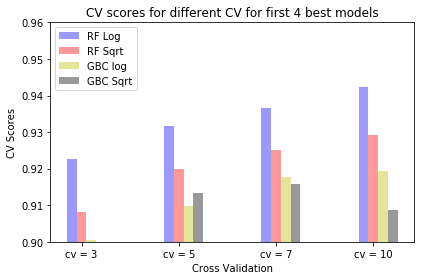

In [43]:
# Plotting graph for different cross validation folds of the four models 
fig, ax = plt.subplots()

index = np.arange(len(scores_avg_RF_log))
bar_width = 0.1

rects1 = ax.bar(index, scores_avg_RF_log, bar_width, alpha=0.4, color='b',label='RF Log')
rects2 = ax.bar(index + bar_width, scores_avg_RF_sq, bar_width,alpha=0.4, color='r',label='RF Sqrt')
rects3 = ax.bar(index + bar_width + bar_width, scores_avg_GBC_log, bar_width,alpha=0.4, color='y',label='GBC log')
rects4 = ax.bar(index + bar_width + bar_width + bar_width, scores_avg_GBC_sq, bar_width,alpha=0.4, color='black',label='GBC Sqrt')

ax.set_xlabel('Cross Validation')
ax.set_ylabel('CV Scores')
ax.set_title('CV scores for different CV for first 4 best models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('cv = 3','cv = 5','cv = 7','cv = 10'))
ax.set_ylim(0.9,0.96)

ax.legend()

fig.tight_layout()
plt.show()

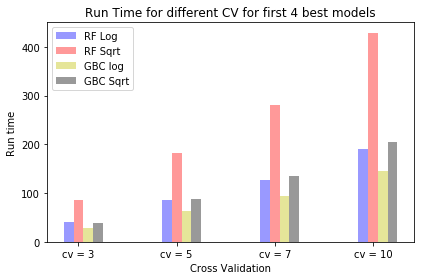

In [44]:
# Plot graph comparing run time of 4 best models

fig, ax = plt.subplots()

index = np.arange(len(time_GBC_sq))
bar_width = 0.1

rects1 = ax.bar(index, time_RF_log, bar_width, alpha=0.4, color='b',label='RF Log')
rects2 = ax.bar(index + bar_width, time_RF_sq, bar_width,alpha=0.4, color='r',label='RF Sqrt')
rects3 = ax.bar(index + bar_width + bar_width, time_GBC_log, bar_width,alpha=0.4, color='y',label='GBC log')
rects4 = ax.bar(index + bar_width + bar_width + bar_width, time_GBC_sq, bar_width,alpha=0.4, color='black',label='GBC Sqrt')

ax.set_xlabel('Cross Validation')
ax.set_ylabel('Run time')
ax.set_title('Run Time for different CV for first 4 best models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('cv = 3','cv = 5','cv = 7','cv = 10'))

ax.legend()

fig.tight_layout()
plt.show()

In [45]:
# Compare 2 best models with ranges of acuracy, test and train time for cv = 10.
print("Range of Accuracies of Model 1 ", min(scores_RF_log[3]), '-', max(scores_RF_log[3]))
print("Range of Accuracies of Model 2 ", min(scores_GBC_sq[3]), '-', max(scores_GBC_sq[3]))

Range of Accuracies of Model 1  0.8753387533875339 - 0.976775956284153
Range of Accuracies of Model 2  0.8154681139755766 - 0.9579945799457995


In [46]:
print("Average Accuracy of Model 1", scores_avg_RF_log[3])
print("Average Run time of Model 1", time_RF_log[3]/10)

Average Accuracy of Model 1 0.9422652557342375
Average Run time of Model 1 18.949600689


In [47]:
# Apply best model to same data without PCA 

from sklearn.metrics import accuracy_score
clf = GBC(n_estimators = 100, learning_rate=0.8, max_depth=7, max_features ='log2', random_state=1300)

start_time = timer()
fit = clf.fit(train_features_train, train_label_train)
pred = fit.predict(features_val)
accuracy_val = accuracy_score(label_val, pred)
elapsed_val = timer() - start_time

In [48]:
# Final Results
print("Accuracy of Validation Set: ",accuracy_val, "Run Time of Validation Set:",elapsed_val)

Accuracy of Validation Set:  0.9053274516457415 Run Time of Validation Set: 14.056687233999583
